In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve

First we are going to load the dataset, which is the accepted files from The Lending Club published in Kaggle data science contest platform as public pseudonymised files in compressed csv format. The information can be downloaded from https://www.kaggle.com/datasets/wordsforthewise/lending-club?resource=download

In [3]:
df=pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression='gzip')
df.info() # We can see that our data has 2.26 million observations with 151 variables

c:\Users\jjsal\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [4]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### Time span of the dataset

Let's start by analising the colum `issue_d` which is the month of funding. This will enable us to understand how the credits are spread over time. Let's see how this column is formatted.

In [10]:
df.issue_d.describe()

count      2260668
unique         139
top       Mar-2016
freq         61992
Name: issue_d, dtype: object

In [7]:
df['issue_d'].value_counts()

Mar-2016    61992
Oct-2015    48631
May-2018    46311
Oct-2018    46305
Aug-2018    46079
            ...  
Aug-2007       74
Jul-2007       63
Sep-2008       57
Sep-2007       53
Jun-2007       24
Name: issue_d, Length: 139, dtype: int64

So we see inmediately that we will have an issue, as this is not formatted as a Date objet, but more like a text we can read. 

In [11]:
df['issue_ty'] = df['issue_d'].str[-4:]
df.dropna(subset=['issue_ty'], inplace=True)
df['issue_ty'] = df['issue_ty'].astype(str).astype(int)
df['issue_ty'].value_counts()

2018    495242
2017    443579
2016    434407
2015    421095
2014    235629
2013    134814
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
Name: issue_ty, dtype: int64

Text(0, 0.5, 'Frequency')

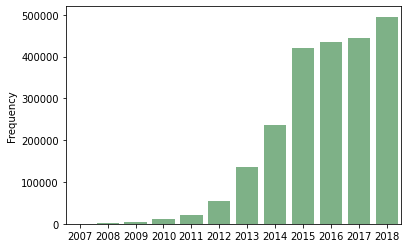

In [42]:
plot=sns.countplot(x=df.issue_ty, color='#76B982')
plot.set_xlabel(None)
plot.set_ylabel('Frequency')

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

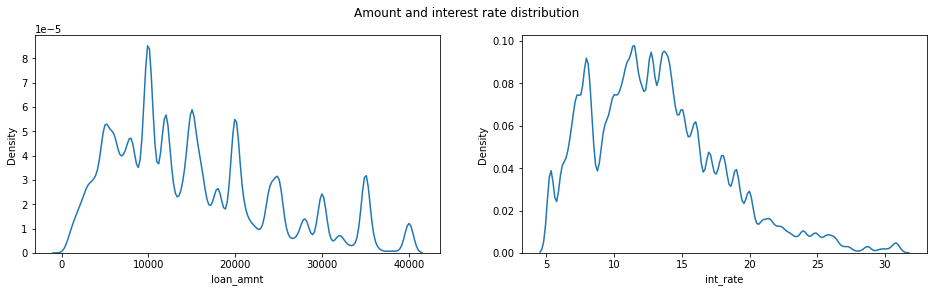

In [53]:
plot2, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))
plot2.suptitle('Amount and interest rate distribution')
sns.kdeplot(ax=ax1, x=df.loan_amnt)
sns.kdeplot(ax=ax2, x=df.int_rate)

In [54]:
df.term.value_counts()

 36 months    1609754
 60 months     650914
Name: term, dtype: int64

In [ ]:
df['termM']=df['term'].str[:3].astype(int)
